# Black Friday Sales Prediction Practice Problem 

## Problem Statement 

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [1]:
import numpy as np
import pandas as pd 

from sklearn import preprocessing
from sklearn.feature_extraction import DictVectorizer 

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn import linear_model

from sklearn.feature_extraction.text import TfidfTransformer 

from sklearn.cross_validation import KFold 
from sklearn.metrics import mean_squared_error 

import matplotlib.pyplot as plt 
import seaborn as sns 

from scipy.stats import norm

% matplotlib inline

/home/parab/anaconda3/envs/car-behavioral-cloning/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Loading dataset 

In [2]:
df_train  = pd.read_csv('Data/train.csv')
df_test = pd.read_csv('Data/test.csv')

In [3]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
# Features 
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [7]:
df_train.shape

(550068, 12)

In [8]:
# Checking for null values 
df_train.isnull().sum().sort_values(ascending = False)

Product_Category_3            383247
Product_Category_2            173638
Purchase                           0
Product_Category_1                 0
Marital_Status                     0
Stay_In_Current_City_Years         0
City_Category                      0
Occupation                         0
Age                                0
Gender                             0
Product_ID                         0
User_ID                            0
dtype: int64

In [9]:
df_train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
User_ID                       233599 non-null int64
Product_ID                    233599 non-null object
Gender                        233599 non-null object
Age                           233599 non-null object
Occupation                    233599 non-null int64
City_Category                 233599 non-null object
Stay_In_Current_City_Years    233599 non-null object
Marital_Status                233599 non-null int64
Product_Category_1            233599 non-null int64
Product_Category_2            161255 non-null float64
Product_Category_3            71037 non-null float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [11]:
# checking null values 
df_test.isnull().sum().sort_values(ascending = False)

Product_Category_3            162562
Product_Category_2             72344
Product_Category_1                 0
Marital_Status                     0
Stay_In_Current_City_Years         0
City_Category                      0
Occupation                         0
Age                                0
Gender                             0
Product_ID                         0
User_ID                            0
dtype: int64

In [12]:
# Product_Category_3 , Product_Category_2 has more null values.

## Purchase 

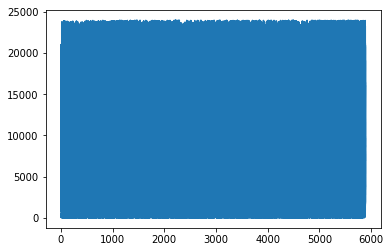

In [49]:
plt.plot(df_train['User_ID'].astype(int), df_train['Purchase'].astype(int))
plt.show()

In [16]:
df_train['Purchase'].describe().transpose()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

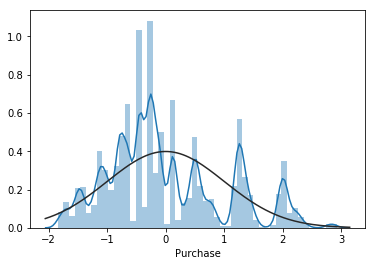

In [19]:
# Plot 
df_purchase1 = df_train['Purchase']
df_purchase2 =((df_purchase1 - df_purchase1.mean()) / df_purchase1.std())
sns.distplot(df_purchase2, fit = norm)

In [20]:
print("Skewness : ", df_train['Purchase'].skew())
print("Kurtosis : ", df_train['Purchase'].kurt())

Skewness :  0.600140003709
Kurtosis :  -0.338377565585


In [21]:
# Total No. of unique Users 
len(df_train['User_ID'].unique())

5891

In [22]:
df_train['User_ID'] = df_train['User_ID'] -1000000
df_test['User_ID'] = df_test['User_ID'] - 1000000

le = preprocessing.LabelEncoder()
df_train['User_ID'] = le.fit_transform(df_train['User_ID'])
df_test['User_ID'] = le.fit_transform(df_test['User_ID'])

In [23]:
# Total No. of unique Products 
print("Unique Product_ID in train dataset :",len(df_train['Product_ID'].unique()))
print("Unique Product_ID in test dataset :",len(df_test['Product_ID'].unique()))

Unique Product_ID in train dataset : 3631
Unique Product_ID in test dataset : 3491


In [24]:
# There are 140 new products 

In [25]:
df_train['Product_ID'] = le.fit_transform(df_train['Product_ID'])
df_test['Product_ID'] = le.fit_transform(df_test['Product_ID'])

In [26]:
print("Unique Product_ID in train dataset :",len(df_train['Product_ID'].unique()))
print("Unique Product_ID in test dataset :",len(df_test['Product_ID'].unique()))

Unique Product_ID in train dataset : 3631
Unique Product_ID in test dataset : 3491


In [40]:
# Gender Types 
df_train['Gender'].unique()

array(['F', 'M'], dtype=object)

In [29]:
# Age 
df_train['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'], dtype=object)

In [30]:
df_train['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [31]:
df_train['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [32]:
df_train['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [33]:
df_train['Marital_Status'].unique()

array([0, 1])

In [34]:
product_category_1 = df_train['Product_Category_1'].unique()
print(product_category_1)
len(product_category_1)

[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]


20

In [35]:
product_category_2 = df_train['Product_Category_2'].unique()
print(product_category_2)
len(product_category_2)

[ nan   6.  14.   2.   8.  15.  16.  11.   5.   3.   4.  12.   9.  10.  17.
  13.   7.  18.]


18

In [36]:
product_category_3 = df_train['Product_Category_3'].unique()
print(product_category_3)
len(product_category_3)

[ nan  14.  17.   5.   4.  16.  15.   8.   9.  13.   6.  12.   3.  18.  11.
  10.]


16

In [37]:
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [38]:
df_train.dtypes

User_ID                         int64
Product_ID                      int64
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

# Data 

In [41]:
df_train.columns 

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [44]:
categorical_col = ['Gender', 'Age', 
                   'Occupation', 
                   'City_Category', 
                   'Stay_in_Current_City_Years', 
                   'Marital_Status',
                  'Product_Category_1',
                  'Product_Category_2',
                  'Product_Category_3']

## Data Corelation

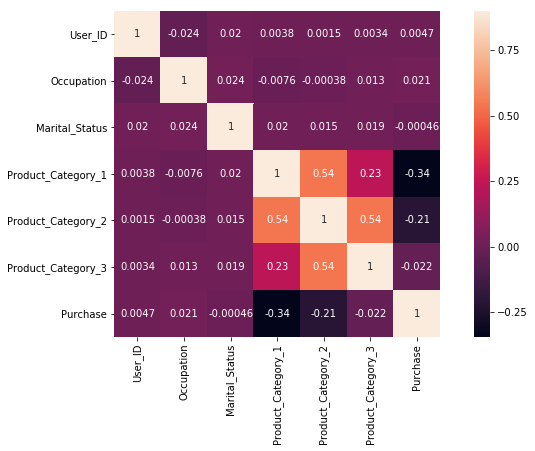

In [29]:
data_corr = df_train.corr()
plt.subplots(figsize = (12, 6))
sns.heatmap(data_corr, vmax = 0.9, square = True, annot= True)
plt.savefig("Plots/Data_Correlation_Heatmap.png")
plt.show()

# Modelling 

# Submission